In [ ]:
import time
import numpy as np
import cv2
from numpy import int16, uint8, log2
import pydvs.generate_spikes as gs
import cython
from testingcode.myfilters import singlenoisefilter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
import pickle
%matplotlib inline

Error: Session cannot generate requests

In [10]:
width=128
height=128

In [11]:
listofframeI =[]
listofframeR =[]
listofframeG =[]
listofframeC =[]

Idat= open("iDatapy.dat",'rb')
Rdat= open("rDatapy.dat",'rb')
Gdat= open("gDatapy.dat",'rb')
Cdat= open("cDatapy.dat",'rb')

listofframeI=pickle.load(Idat)
listofframeR=pickle.load(Rdat)
listofframeG=pickle.load(Gdat)
listofframeC=pickle.load(Cdat)

Idat.close()
Rdat.close()
Gdat.close()
Cdat.close()

In [12]:
def sampleTester(indexer):
    #14 down
    #28 up
    #252 right
    #265 left 
    #165 front
    #177 back


    img_index =indexer

    print("main")
    plt.figure()
    plt.imshow(listofframeC[img_index])

    Hori = np.concatenate((listofframeI[img_index], listofframeR[img_index]), axis=1)
    Hori = np.concatenate((Hori, listofframeG[img_index]), axis=1)
    plt.figure()
    plt.imshow ( Hori, cmap='gray', vmin=0, vmax=255)
    print("index :",img_index)

    mapimage=np.zeros((128,128,3),np.uint8)


    rir = np.copy(listofframeR[img_index])
    rig = np.copy(listofframeG[img_index])
    rii = np.copy(listofframeI[img_index])
    mapimage[:,:,0]=0
    mapimage[:,:,1]=rir
    mapimage[:,:,2]=rig
    print("colored map")
    plt.figure()
    plt.imshow (mapimage)

    #sow filtered
    fi=np.zeros_like(rii)
    fr=np.zeros_like(rir)
    fg=np.zeros_like(rig)
    singlenoisefilter(fr,rir,128,2)
    singlenoisefilter(fg,rig,128,2)
    singlenoisefilter(fi,rii,128,2)

    Hori2 = np.concatenate((rii, rir), axis=1)
    Hori2 = np.concatenate((Hori2, rig), axis=1)
    print("filtered   N  R   G")
    plt.figure()
    plt.imshow (Hori2, cmap='gray', vmin=0, vmax=255)

    #--------------------------------
    #adding some thing
    kernel = np.ones((2,2),np.uint8)
    dili = cv2.dilate(rii,kernel,iterations=3)
    dilr = cv2.dilate(rir,kernel,iterations=1)
    dilg = cv2.dilate(rig,kernel,iterations=1)

    Hori3 = np.concatenate((dili, dilr), axis=1)
    Hori3 = np.concatenate((Hori3, dilg), axis=1)
    print("dil   N  R   G")
    plt.figure()
    plt.imshow (Hori3, cmap='gray', vmin=0, vmax=255)



    #-----------------------------------------------
    ret,thresh = cv2.threshold(dili,127,255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #img=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    imges11=np.zeros([width,height,3],np.uint8)
    cv2.drawContours(imges11,contours,10,(80,60,0),3)
    #cv2.imshow('output1',imges11)

    try: hierarchy = hierarchy[0]
    except: hierarchy = []

    min_x, min_y = width, height
    max_x = max_y = 0

    ar=[]
        # computes the bounding box for the contour, and draws it on the frame,

    connt=0

    for contour, hier in zip(contours, hierarchy):
        (x,y,w,h) = cv2.boundingRect(contour)
        min_x, max_x = min(x, min_x), max(x+w, max_x)
        min_y, max_y = min(y, min_y), max(y+h, max_y)
        
        if w > 5 and h > 5  and w<200 and h<200:
            cv2.rectangle(imges11, (x,y), (x+w,y+h), (0, 0, 255), 2)
            ar.append([x,y,x+w,x+h])
            cv2.putText(imges11,"C:"+str(connt),(x,y),cv2.FONT_HERSHEY_PLAIN,1,(8,255,8),1)
        connt+=1
    #if max_x - min_x > 10 and max_y - min_y > 10 and max_y - min_y < 150 and max_x - min_x<150:
    #    cv2.rectangle(imges11, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)
        
    plt.figure()
    plt.imshow (imges11)
    #fl=
    #print(fl)

    ff= np.zeros_like(rii)
    #ff[contours[10].squeeze()[:,1],contours[10].squeeze()[:,0]]=0
    #cv2.fillPoly(ff, pts =contours[10], color=(0,0,0))
    cv2.drawContours(ff, contours, 10, color=(255, 255, 255), thickness=cv2.FILLED)
    img1_bg = cv2.bitwise_and(rig,rig,mask = ff)
    plt.figure()
    plt.imshow (ff)

    plt.figure()
    plt.imshow (img1_bg)

    img1_br = cv2.bitwise_and(rir,rir,mask = ff)
    plt.figure()
    plt.imshow (img1_br)

    img1_bi = cv2.bitwise_and(rii,rii,mask = ff)
    plt.figure()
    plt.imshow (img1_bi)



main
index : 14
colored map
filtered   N  R   G
dil   N  R   G


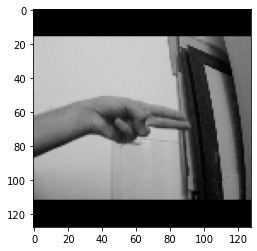

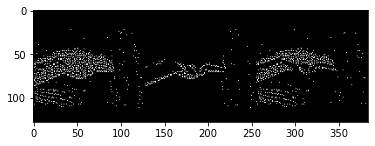

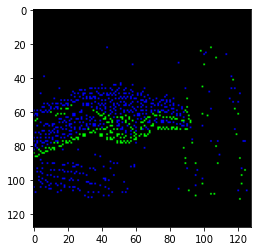

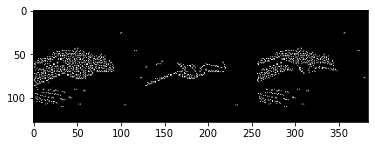

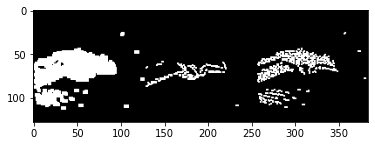

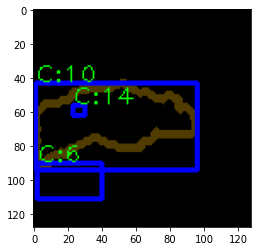

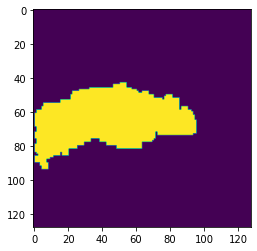

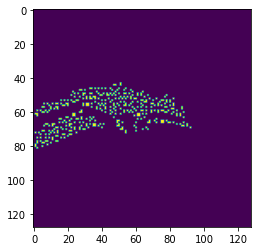

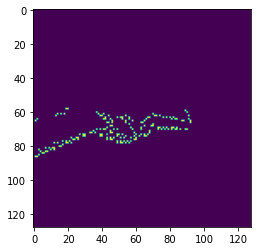

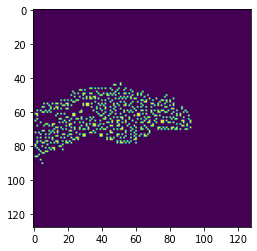

In [13]:
sampleTester(14)
#sampleTester(177)
#sampleTester(165)
#sampleTester(28)

In [6]:
def drawobject(figname,img):


  ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  #img=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
  imges11=np.zeros([width,height,3],np.uint8)
  cv2.drawContours(imges11,contours,-1,(80,60,0),3)
  #cv2.imshow('output1',imges11)

  try: hierarchy = hierarchy[0]
  except: hierarchy = []

  min_x, min_y = width, height
  max_x = max_y = 0

  ar=[]
      # computes the bounding box for the contour, and draws it on the frame,
  for contour, hier in zip(contours, hierarchy):
      (x,y,w,h) = cv2.boundingRect(contour)
      min_x, max_x = min(x, min_x), max(x+w, max_x)
      min_y, max_y = min(y, min_y), max(y+h, max_y)
      if w > 40 and h > 40  and w<150 and h<150:
          cv2.rectangle(imges11, (x,y), (x+w,y+h), (0, 0, 255), 2)
          ar.append([x,y,x+w,x+h])
  #if max_x - min_x > 10 and max_y - min_y > 10 and max_y - min_y < 150 and max_x - min_x<150:
  #    cv2.rectangle(imges11, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)
  cv2.imshow(figname,imges11)
  return ar

In [7]:
def dvs_direction_detection(imgN,imgR,imgG):
    rb_count=np.count_nonzero(imgR[:,0:50])+np.count_nonzero(imgR[:,80:128])+np.count_nonzero(imgR[0:50,:])+np.count_nonzero(imgR[80:128,:])
    gb_count=np.count_nonzero(imgG[:,0:50])+np.count_nonzero(imgG[:,80:128])+np.count_nonzero(imgG[0:50,:])+np.count_nonzero(imgG[80:128,:])
    if rb_count > gb_count :
        return 'I'
    else :
        return 'O'
    text ="  R U :"+str(np.count_nonzero(imgR[:,0:50]))
    text +="  R D :"+str(np.count_nonzero(imgR[:,80:128]))
    text +="  R L :"+str(np.count_nonzero(imgR[0:50,:]))
    text +="  R R :"+str(np.count_nonzero(imgR[80:128,:]))

    text +="  G U :"+str(np.count_nonzero(imgG[:,0:50]))
    text +="  G D :"+str(np.count_nonzero(imgG[:,80:128]))
    text +="  G L :"+str(np.count_nonzero(imgG[0:50,:]))
    text +="  G R :"+str(np.count_nonzero(imgG[80:128,:]))
    return text

In [34]:
from time import sleep
print(len(listofframeI))
img_index =0
mapimage = np.zeros((width,height,3),np.uint8)
#-----------------------------------------------------------------
while True:  
    #img_index = 148
    cv2.imshow("main",listofframeC[img_index])
    
    Hori = np.concatenate((listofframeI[img_index], listofframeR[img_index]), axis=1)
    Hori = np.concatenate((Hori, listofframeG[img_index]), axis=1)
    cv2.imshow ("Hori   N  R   G", Hori)
    print("index :",img_index)

    rir = np.copy(listofframeR[img_index])
    rig = np.copy(listofframeG[img_index])
    rii = np.copy(listofframeI[img_index])

    mapimage[:,:,1]=rir
    mapimage[:,:,2]=rig
    cv2.imshow ("colored map", mapimage)



    #sow filtered
    fi=np.zeros_like(rii)
    fr=np.zeros_like(rir)
    fg=np.zeros_like(rig)
    singlenoisefilter(fr,rir,128,3)
    singlenoisefilter(fg,rig,128,3)
    singlenoisefilter(fi,rii,128,3)

    Hori2 = np.concatenate((rii, rir), axis=1)
    Hori2 = np.concatenate((Hori2, rig), axis=1)
    cv2.imshow ("filtered   N  R   G", Hori2)

    #--------------------------------
    #adding some thing
    kernel = np.ones((5,5),np.uint8)
    dili = cv2.dilate(rii,kernel,iterations=1)
    dilr = cv2.dilate(rir,kernel,iterations=5)
    dilg = cv2.dilate(rig,kernel,iterations=1)

    Hori3 = np.concatenate((dili, dilr), axis=1)
    Hori3 = np.concatenate((Hori3, dilg), axis=1)
    cv2.imshow ("dil   N  R   G", Hori3)

    #draw count
    ar=drawobject("r countur",dilr)

    cu=listofframeC[img_index]
    cu =cv2.resize(cu,(600,600))
    for x in ar:
        cv2.rectangle(cu, (x[0],x[1]), (x[2],x[3]), (0, 0, 255), 2)
        cv2.putText(cu,dvs_direction_detection(rii,rir,rig),(x[0],x[1]),cv2.FONT_HERSHEY_PLAIN,1,(8,255,8),1)
    
    cv2.namedWindow("object", cv2.WINDOW_AUTOSIZE)
    cv2.imshow ("object", cu)




    #controlls --------------------------------------------------------------------
    breakfag= False
    while True:
        key=cv2.waitKey(0)
        if  key& 0xFF == ord('q'):
            breakfag = True
            break
        if key & 0xFF == ord('6'):
            img_index+=1
            if img_index >=len(listofframeI):
                img_index =0
            break
        if key & 0xFF == ord('4'):
            img_index-=1
            break
    if breakfag == True:
        break  
    #-------------------------------------------------------------------------------
cv2.destroyAllWindows()

448
index : 0
index : 1
index : 2
index : 3
index : 4
index : 5
index : 6
index : 7
index : 8
index : 9
index : 10
index : 11
index : 12
index : 13
index : 14
index : 15
index : 16
index : 17
index : 18
index : 19
index : 20
index : 21
index : 22
index : 23
index : 24
index : 25
index : 26
index : 27
index : 28
index : 29
index : 30
index : 31
index : 32
index : 33
index : 34
index : 35
index : 36
index : 37
index : 38
index : 39
index : 40
index : 41
index : 42
index : 43
index : 44
index : 45
index : 46
index : 47
index : 48
index : 49
index : 50
index : 51
index : 52
index : 53
index : 54
index : 55
index : 56
index : 57
index : 58
index : 59
index : 60
index : 61
index : 62
index : 63
index : 64
index : 65
index : 66
index : 67
index : 68
index : 69
index : 70
index : 71
index : 72
index : 73
index : 74
index : 75
index : 76
index : 77
index : 78
index : 79
index : 80
index : 81
index : 82
index : 83
index : 84
index : 85
index : 86
index : 87
index : 88
index : 89
index : 90
index

#===========================================

#14 down
#28 up
#252 right
#265 left 
#165 front
#177 back


img_index =14

print("main")
plt.figure()
plt.imshow(listofframeC[img_index])

Hori = np.concatenate((listofframeI[img_index], listofframeR[img_index]), axis=1)
Hori = np.concatenate((Hori, listofframeG[img_index]), axis=1)
plt.figure()
plt.imshow ( Hori, cmap='gray', vmin=0, vmax=255)
print("index :",img_index)

mapimage=np.zeros((128,128,3),np.uint8)


rir = np.copy(listofframeR[img_index])
rig = np.copy(listofframeG[img_index])
rii = np.copy(listofframeI[img_index])
mapimage[:,:,0]=0
mapimage[:,:,1]=rir
mapimage[:,:,2]=rig
print("colored map")
plt.figure()
plt.imshow (mapimage)

#sow filtered
fi=np.zeros_like(rii)
fr=np.zeros_like(rir)
fg=np.zeros_like(rig)
singlenoisefilter(fr,rir,128,2)
singlenoisefilter(fg,rig,128,2)
singlenoisefilter(fi,rii,128,2)

Hori2 = np.concatenate((rii, rir), axis=1)
Hori2 = np.concatenate((Hori2, rig), axis=1)
print("filtered   N  R   G")
plt.figure()
plt.imshow (Hori2, cmap='gray', vmin=0, vmax=255)

#--------------------------------
#adding some thing
kernel = np.ones((2,2),np.uint8)
dili = cv2.dilate(rii,kernel,iterations=3)
dilr = cv2.dilate(rir,kernel,iterations=1)
dilg = cv2.dilate(rig,kernel,iterations=1)

Hori3 = np.concatenate((dili, dilr), axis=1)
Hori3 = np.concatenate((Hori3, dilg), axis=1)
print("dil   N  R   G")
plt.figure()
plt.imshow (Hori3, cmap='gray', vmin=0, vmax=255)



#-----------------------------------------------
ret,thresh = cv2.threshold(dili,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#img=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
imges11=np.zeros([width,height,3],np.uint8)
cv2.drawContours(imges11,contours,10,(80,60,0),3)
#cv2.imshow('output1',imges11)

try: hierarchy = hierarchy[0]
except: hierarchy = []

min_x, min_y = width, height
max_x = max_y = 0

ar=[]
    # computes the bounding box for the contour, and draws it on the frame,

connt=0

for contour, hier in zip(contours, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    min_x, max_x = min(x, min_x), max(x+w, max_x)
    min_y, max_y = min(y, min_y), max(y+h, max_y)
    
    if w > 5 and h > 5  and w<200 and h<200:
        cv2.rectangle(imges11, (x,y), (x+w,y+h), (0, 0, 255), 2)
        ar.append([x,y,x+w,x+h])
        cv2.putText(imges11,"C:"+str(connt),(x,y),cv2.FONT_HERSHEY_PLAIN,1,(8,255,8),1)
    connt+=1
#if max_x - min_x > 10 and max_y - min_y > 10 and max_y - min_y < 150 and max_x - min_x<150:
#    cv2.rectangle(imges11, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)
    
plt.figure()
plt.imshow (imges11)
#fl=
#print(fl)

ff= np.zeros_like(rii)
#ff[contours[10].squeeze()[:,1],contours[10].squeeze()[:,0]]=0
#cv2.fillPoly(ff, pts =contours[10], color=(0,0,0))
cv2.drawContours(ff, contours, 10, color=(255, 255, 255), thickness=cv2.FILLED)
img1_bg = cv2.bitwise_and(rig,rig,mask = ff)
plt.figure()
plt.imshow (ff)

plt.figure()
plt.imshow (img1_bg)

img1_br = cv2.bitwise_and(rir,rir,mask = ff)
plt.figure()
plt.imshow (img1_br)

img1_bi = cv2.bitwise_and(rii,rii,mask = ff)
plt.figure()
plt.imshow (img1_bi)

In [ ]:
#14 down
#28 up
#252 right
#265 left 
#165 front  410
#177 back   428


img_index =410

print("main")
plt.figure()
plt.imshow(listofframeC[img_index])

Hori = np.concatenate((listofframeI[img_index], listofframeR[img_index]), axis=1)
Hori = np.concatenate((Hori, listofframeG[img_index]), axis=1)
plt.figure()
plt.imshow ( Hori, cmap='gray', vmin=0, vmax=255)
print("index :",img_index)

mapimage=np.zeros((128,128,3),np.uint8)


rir = np.copy(listofframeR[img_index])
rig = np.copy(listofframeG[img_index])
rii = np.copy(listofframeI[img_index])
mapimage[:,:,0]=0
mapimage[:,:,1]=rir
mapimage[:,:,2]=rig
print("colored map")
plt.figure()
plt.imshow (mapimage)

#sow filtered
fi=np.zeros_like(rii)
fr=np.zeros_like(rir)
fg=np.zeros_like(rig)
singlenoisefilter(fr,rir,128,2)
singlenoisefilter(fg,rig,128,2)
singlenoisefilter(fi,rii,128,2)

Hori2 = np.concatenate((rii, rir), axis=1)
Hori2 = np.concatenate((Hori2, rig), axis=1)
print("filtered   N  R   G")
plt.figure()
plt.imshow (Hori2, cmap='gray', vmin=0, vmax=255)

#--------------------------------
#adding some thing
kernel = np.ones((2,2),np.uint8)
dili = cv2.dilate(rii,kernel,iterations=3)
dilr = cv2.dilate(rir,kernel,iterations=1)
dilg = cv2.dilate(rig,kernel,iterations=1)

Hori3 = np.concatenate((dili, dilr), axis=1)
Hori3 = np.concatenate((Hori3, dilg), axis=1)
print("dil   N  R   G")
plt.figure()
plt.imshow (Hori3, cmap='gray', vmin=0, vmax=255)



#-----------------------------------------------
ret,thresh = cv2.threshold(dili,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#img=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
imges11=np.zeros([width,height,3],np.uint8)
cv2.drawContours(imges11,contours,10,(80,60,0),3)
#cv2.imshow('output1',imges11)

try: hierarchy = hierarchy[0]
except: hierarchy = []

min_x, min_y = width, height
max_x = max_y = 0

ar=[]
    # computes the bounding box for the contour, and draws it on the frame,

connt=0

for contour, hier in zip(contours, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    min_x, max_x = min(x, min_x), max(x+w, max_x)
    min_y, max_y = min(y, min_y), max(y+h, max_y)
    
    if w > 5 and h > 5  and w<200 and h<200:
        cv2.rectangle(imges11, (x,y), (x+w,y+h), (0, 0, 255), 2)
        ar.append([x,y,x+w,x+h])
        cv2.putText(imges11,"C:"+str(connt),(x,y),cv2.FONT_HERSHEY_PLAIN,1,(8,255,8),1)
    connt+=1
#if max_x - min_x > 10 and max_y - min_y > 10 and max_y - min_y < 150 and max_x - min_x<150:
#    cv2.rectangle(imges11, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)
    
plt.figure()
plt.imshow (imges11)
#fl=
#print(fl)

ff= np.zeros_like(rii)

ff2=ff.copy()
#ff[contours[10].squeeze()[:,1],contours[10].squeeze()[:,0]]=0
#cv2.fillPoly(ff, pts =contours[10], color=(0,0,0))
con = 6

cv2.drawContours(ff, contours, con, color=(80, 0, 255), thickness=8)

cv2.drawContours(ff2, contours, con, color=(255, 255, 255), thickness=cv2.FILLED)

ff = cv2.bitwise_and(ff,ff,mask = ff2)

img1_bg = cv2.bitwise_and(rig,rig,mask = ff)
plt.figure()
plt.imshow (ff)

plt.figure()
plt.imshow (img1_bg)

img1_br = cv2.bitwise_and(rir,rir,mask = ff)
plt.figure()
plt.imshow (img1_br)

img1_bi = cv2.bitwise_and(rii,rii,mask = ff)
plt.figure()
plt.imshow (img1_bi)

Error: Session cannot generate requests